# Exploratory Data Analysis
## Number of images per age group

In [3]:
import histogram
import apply_algorithm
path = 'Images' # will be changed later once the dataset is ready
# age_histogram code goes here when ready

## Edge concentration per age group

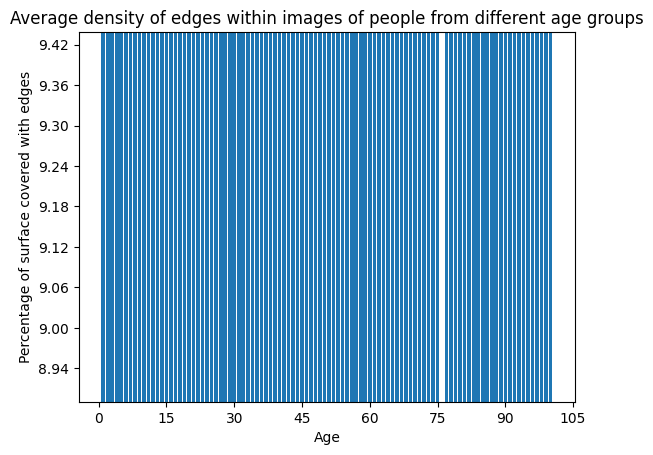

In [5]:
import os
import cv2
from PIL import Image
from numpy import asarray
import numpy

def wrinkles(path):
    n = len(os.listdir(path))
    arr = [0] * n
    i = 0
    for file in os.listdir(path):
        temp = cv2.cvtColor(asarray(Image.open(os.path.join(path, file))), cv2.COLOR_BGR2GRAY)
        arr[i] = numpy.average(cv2.Canny(cv2.GaussianBlur(src=temp, ksize=(3, 5), sigmaX=0.5), 70, 135))
        i += 1
    return numpy.average(arr) * 100 / 255

data = apply_algorithm.apply(wrinkles, path)
histogram.histogram(data, "Average density of edges within images of people from different age groups", "Age", 
                    "Percentage of surface covered with edges", "edge_histogram.jpg")

## Average pixel brightness

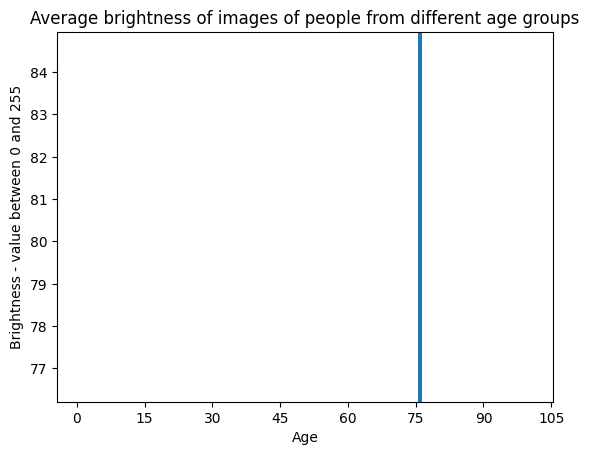

In [7]:
def average_pixel_color_and_brightness(path):
    def brightness(R,G,B):
        return 0.2126*R + 0.7152*G + 0.0722*B
    files=os.listdir(path)
    n=len(files)
    average_red=[0]*n
    average_green=[0]*n
    average_blue=[0]*n
    average_brightness=[0]*n
    i=0
    for file in files:
        image=cv2.imread((os.path.join(path,file)))
        average_color_row = numpy.average(image, axis=0)
        average_color = numpy.average(average_color_row, axis=0)
        r=average_color[0]
        g=average_color[1]
        b=average_color[2]
        average_red[i]=r
        average_green[i]=g
        average_blue[i]=b
        average_brightness[i]=brightness(r,g,b)
        i=i+1
    red=numpy.average(average_red)
    green=numpy.average(average_green)
    blue=numpy.average(average_blue)
    brightness=numpy.average(average_brightness)
    return [[red,green,blue],brightness]

data = apply_algorithm.apply(average_pixel_color_and_brightness, path)
histogram.histogram([i[1] for i in data], "Average brightness of images of people from different age groups", "Age", 
                    "Brightness - value between 0 and 255", "brightness_histogram.jpg")

## Average pixel color

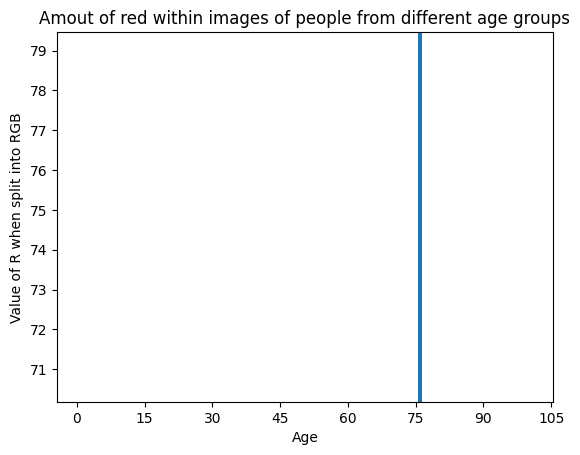

In [9]:
RGB = [i[0] for i in data]
histogram.histogram([i[0] for i in RGB], "Amout of red within images of people from different age groups", "Age", 
                    "Value of R when split into RGB", "red_histogram.jpg")

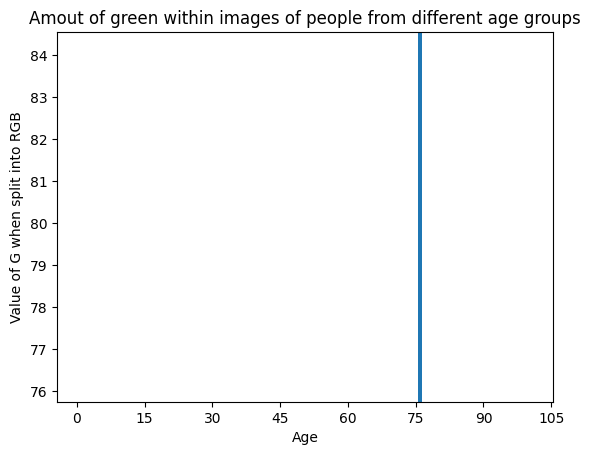

In [10]:
histogram.histogram([i[1] for i in RGB], "Amout of green within images of people from different age groups", "Age", 
                    "Value of G when split into RGB", "green_histogram.jpg")

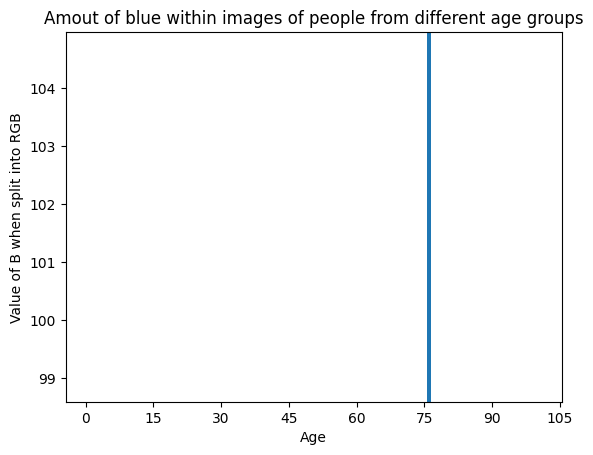

In [11]:
histogram.histogram([i[2] for i in RGB], "Amout of blue within images of people from different age groups", "Age", 
                    "Value of B when split into RGB", "blue_histogram.jpg")

In [ ]:
# combined colour graph goes here

# Contrast Analysis

In [1]:
import os
import matplotlib.pyplot as plt
from boxplot import boxplot
from contrast import contrast

# specify path to the dataset
dataset_path = '/home/dawid/Desktop/dataset'

In [2]:
young_ages = list(range(1, 11))
old_ages = list(range(80, 101))

age_photos = {}

for ages in [young_ages, old_ages]:
    for age in ages:
        age_photos[age] = [plt.imread(os.path.join(dataset_path, str(age), x)) for x in os.listdir(os.path.join(dataset_path, str(age)))]

In [3]:
age_contrast = {}

for age in age_photos:
    age_contrast[age] = []
    for photo in age_photos[age]:
        img_contrast = contrast(photo)
        age_contrast[age].append(img_contrast)

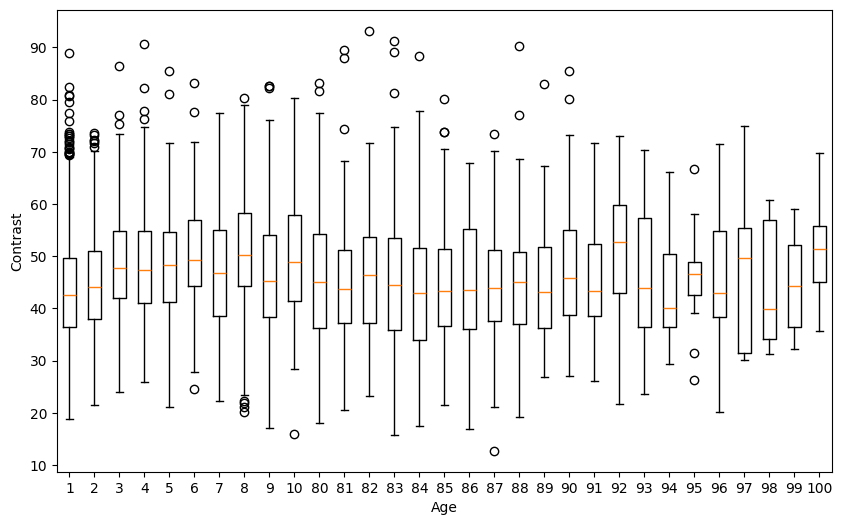

In [4]:
x_box_1 = [age_contrast[key] for key in age_contrast]
labels_box_1 = young_ages + old_ages
boxplot(x_box_1, labels_box_1, 'Age', 'Contrast', figsize=(10,6))

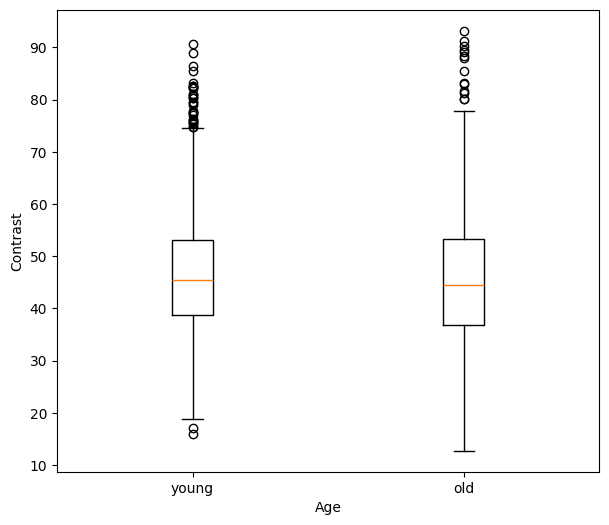

In [5]:
young_contrast = [item for sublist in [age_contrast[age] for age in young_ages] for item in sublist]
old_contrast = [item for sublist in [age_contrast[age] for age in old_ages] for item in sublist]
x_box_2 = [young_contrast, old_contrast]
labels_box_2 = ['young', 'old']
boxplot(x_box_2, labels_box_2, 'Age', 'Contrast')

Conclusion: Contrast doesn't differentiate photos of the young from photos of the old

## Observations
- observations
- will be
- listed here